In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### LOAD FILE AND EDA

In [2]:
exchange_data = pd.read_feather('data.feather')

In [3]:
exchange_data.head()

,exchange_time,BTC-USD-SWAP@OKEX_bid_price_1,BTC-USD-SWAP@OKEX_ask_price_1,BTC-USD-SWAP@OKEX_bid_vol_1,BTC-USD-SWAP@OKEX_ask_vol_1
0,2022-02-07 00:00:00.007000+00:00,42418.3,42418.4,51.0,57.0
1,2022-02-07 00:00:00.028000+00:00,42418.3,42418.4,51.0,152.0
2,2022-02-07 00:00:00.066000+00:00,42418.3,42418.4,51.0,83.0
3,2022-02-07 00:00:00.146000+00:00,42418.3,42418.4,51.0,306.0
4,2022-02-07 00:00:00.156000+00:00,42418.3,42418.4,51.0,312.0


In [4]:
exchange_data.describe()

,BTC-USD-SWAP@OKEX_bid_price_1,BTC-USD-SWAP@OKEX_ask_price_1,BTC-USD-SWAP@OKEX_bid_vol_1,BTC-USD-SWAP@OKEX_ask_vol_1
count,1.534318e+07,1.534318e+07,1.534318e+07,1.534318e+07
mean,4.338289e+04,4.338327e+04,5.955515e+02,5.288940e+02
std,8.976420e+02,8.976375e+02,1.674130e+03,1.194477e+03
min,4.165650e+04,4.165660e+04,1.000000e+00,1.000000e+00
25%,4.250700e+04,4.250730e+04,4.100000e+01,2.500000e+01
50%,4.346060e+04,4.346110e+04,2.160000e+02,1.670000e+02
75%,4.407170e+04,4.407190e+04,7.000000e+02,5.780000e+02
max,4.588670e+04,4.594920e+04,2.999870e+05,2.963020e+05


In [5]:
exchange_data.shape

(15343185, 5)

In [6]:
for column in exchange_data.columns[1:]:
    print(f'+++{column}++')
    print(f'mean - {exchange_data[column].mean()}')
    print(f'median - {exchange_data[column].median()}')
    print(f'quantile 0.25 - {exchange_data[column].quantile(q=0.25)}')
    print(f'quantile 0.5 - {exchange_data[column].quantile(q=0.5)}')
    print(f'quantile 0.75 - {exchange_data[column].quantile(q=0.75)}')
    print()

+++BTC-USD-SWAP@OKEX_bid_price_1++
mean - 43382.89463718262
median - 43460.6
quantile 0.25 - 42507.0
quantile 0.5 - 43460.6
quantile 0.75 - 44071.7

+++BTC-USD-SWAP@OKEX_ask_price_1++
mean - 43383.26771892533
median - 43461.1
quantile 0.25 - 42507.3
quantile 0.5 - 43461.1
quantile 0.75 - 44071.9

+++BTC-USD-SWAP@OKEX_bid_vol_1++
mean - 595.5515334658352
median - 216.0
quantile 0.25 - 41.0
quantile 0.5 - 216.0
quantile 0.75 - 700.0

+++BTC-USD-SWAP@OKEX_ask_vol_1++
mean - 528.893979704996
median - 167.0
quantile 0.25 - 25.0
quantile 0.5 - 167.0
quantile 0.75 - 578.0



In [ ]:
exchange_data.columns

<AxesSubplot:>

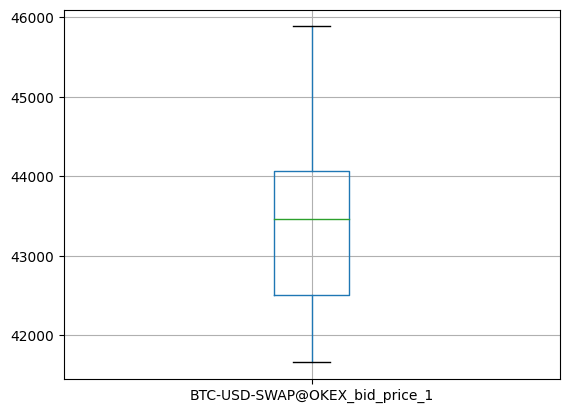

In [8]:
exchange_data.boxplot(column='BTC-USD-SWAP@OKEX_bid_price_1')

<AxesSubplot:>

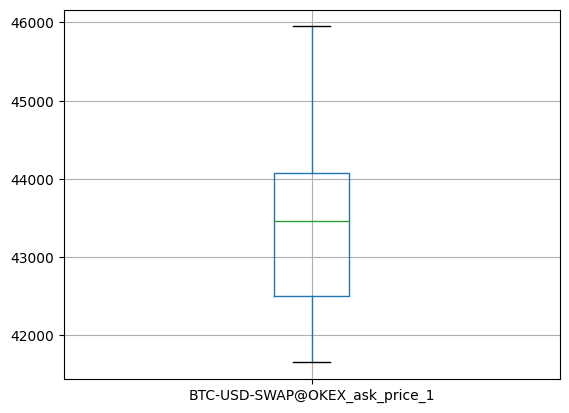

In [9]:
exchange_data.boxplot(column='BTC-USD-SWAP@OKEX_ask_price_1')

<AxesSubplot:ylabel='Frequency'>

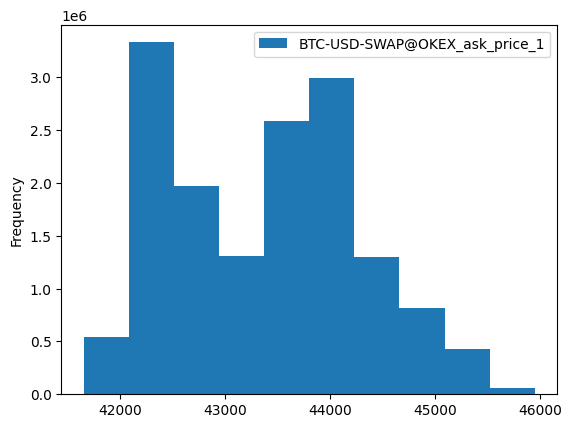

In [10]:
exchange_data[['BTC-USD-SWAP@OKEX_ask_price_1']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

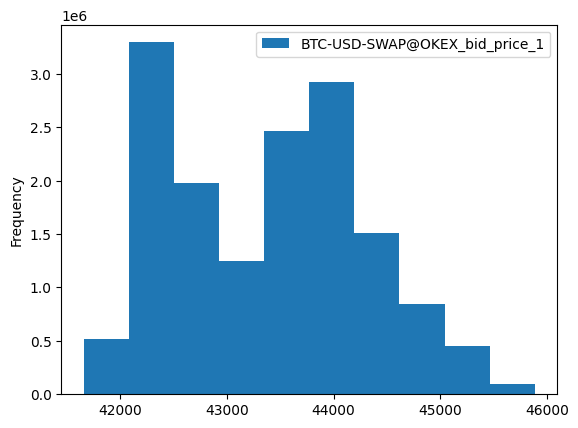

In [11]:
exchange_data[['BTC-USD-SWAP@OKEX_bid_price_1']].plot.hist()

In [12]:
exchange_data['diff'] = exchange_data['BTC-USD-SWAP@OKEX_ask_price_1']  - exchange_data['BTC-USD-SWAP@OKEX_bid_price_1']

In [13]:
exchange_data['diff'].mean(), exchange_data['diff'].median()

(0.3730817428062749, 0.09999999999854481)

<AxesSubplot:>

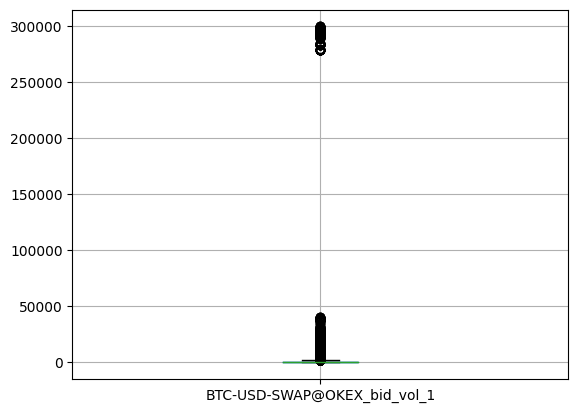

In [14]:
exchange_data.boxplot(column='BTC-USD-SWAP@OKEX_bid_vol_1')

<AxesSubplot:>

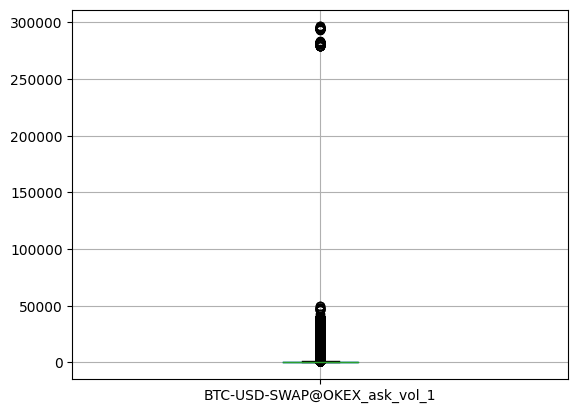

In [15]:
exchange_data.boxplot(column='BTC-USD-SWAP@OKEX_ask_vol_1')

<AxesSubplot:xlabel='BTC-USD-SWAP@OKEX_bid_price_1', ylabel='BTC-USD-SWAP@OKEX_bid_vol_1'>

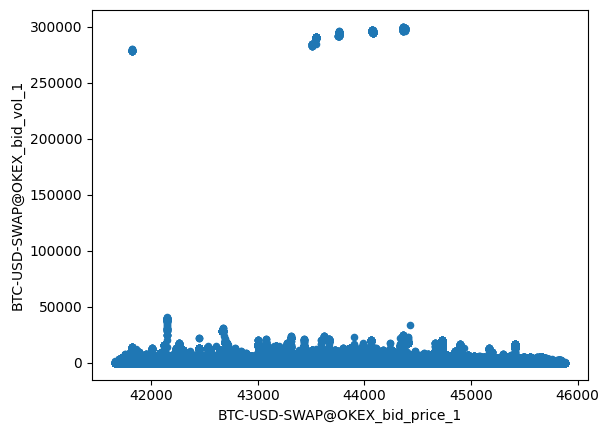

In [22]:
exchange_data.plot.scatter(x='BTC-USD-SWAP@OKEX_bid_price_1', y='BTC-USD-SWAP@OKEX_bid_vol_1')

<AxesSubplot:xlabel='BTC-USD-SWAP@OKEX_ask_price_1', ylabel='BTC-USD-SWAP@OKEX_ask_vol_1'>

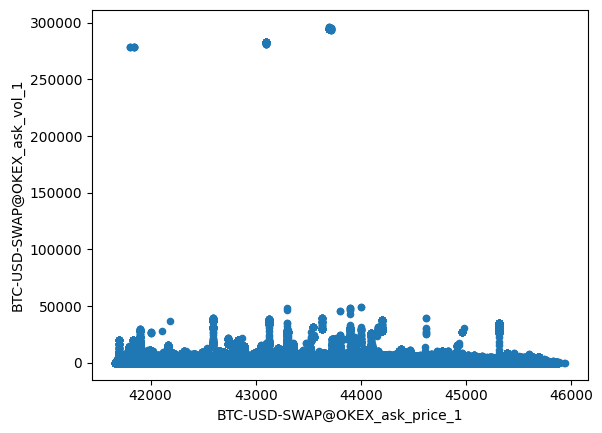

In [23]:
exchange_data.plot.scatter(x='BTC-USD-SWAP@OKEX_ask_price_1', y='BTC-USD-SWAP@OKEX_ask_vol_1')

In [18]:
import statsmodels.api as sm

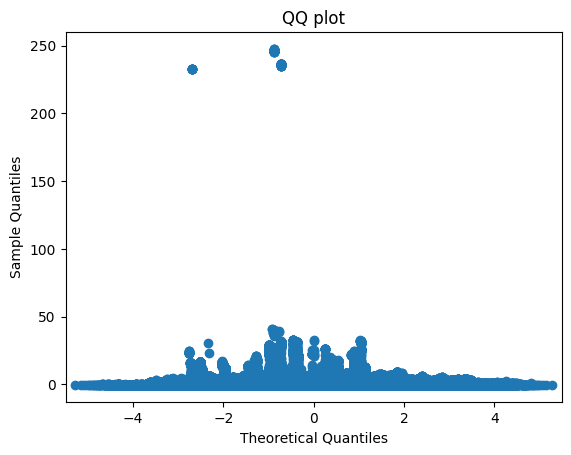

In [19]:
sm.qqplot(exchange_data[['BTC-USD-SWAP@OKEX_ask_vol_1']], fit = True)
plt.title("QQ plot")
plt.show()

In [7]:
bid_price_clm, ask_price_clm = 'BTC-USD-SWAP@OKEX_bid_price_1', 'BTC-USD-SWAP@OKEX_ask_price_1'

In [8]:
exchange_data['average'] = (exchange_data[bid_price_clm] + exchange_data[ask_price_clm])/2

In [9]:
exchange_data.head()

,exchange_time,BTC-USD-SWAP@OKEX_bid_price_1,BTC-USD-SWAP@OKEX_ask_price_1,BTC-USD-SWAP@OKEX_bid_vol_1,BTC-USD-SWAP@OKEX_ask_vol_1,average
0,2022-02-07 00:00:00.007000+00:00,42418.3,42418.4,51.0,57.0,42418.35
1,2022-02-07 00:00:00.028000+00:00,42418.3,42418.4,51.0,152.0,42418.35
2,2022-02-07 00:00:00.066000+00:00,42418.3,42418.4,51.0,83.0,42418.35
3,2022-02-07 00:00:00.146000+00:00,42418.3,42418.4,51.0,306.0,42418.35
4,2022-02-07 00:00:00.156000+00:00,42418.3,42418.4,51.0,312.0,42418.35


In [10]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15343185 entries, 0 to 15343184
Data columns (total 6 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   exchange_time                  datetime64[ns, UTC]
 1   BTC-USD-SWAP@OKEX_bid_price_1  float64            
 2   BTC-USD-SWAP@OKEX_ask_price_1  float64            
 3   BTC-USD-SWAP@OKEX_bid_vol_1    float64            
 4   BTC-USD-SWAP@OKEX_ask_vol_1    float64            
 5   average                        float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 702.4 MB


In [11]:
exchange_data['delta'] = (exchange_data['exchange_time'] - exchange_data['exchange_time'].shift()).fillna(pd.Timedelta(seconds=0))

In [12]:
exchange_data['delta_sec'] = exchange_data['delta'].astype('timedelta64[ms]').astype(np.int32)

In [13]:
len(exchange_data['delta_sec'])

15343185

In [14]:
averages = exchange_data['average'].to_list()
time_diff_ms = exchange_data['delta_sec'].to_list()

In [15]:
len(averages)

15343185

In [16]:
ema_values = [averages[0]]

In [17]:
%%time
for num in range(1, len(averages)):
    if time_diff_ms[num] <= 1000:
        ema_values.append(
            ema_values[num-1] + (averages[num] - ema_values[num-1])*(time_diff_ms[num]/1e7)
        )
    else:
        ema_values.append(
            ema_values[num-1] + (averages[num] - ema_values[num-1])*(1000/1e7)
        )


CPU times: user 9.38 s, sys: 210 ms, total: 9.59 s
Wall time: 9.77 s


In [18]:
len(ema_values)

15343185

In [19]:
exchange_data['EMA'] = ema_values

In [31]:
pos_values = [0]

In [32]:
exchange_data.shape[0]

15343185

In [33]:
%%time

pos = 0
for num in range(1, exchange_data.shape[0]):
    if num <= 10000:
        pos_values.append(pos)
    else:
        if averages [num] - ema_values[num] > 50 and pos_values[num-1] < 10:
            pos += 1
        elif averages [num] - ema_values[num] < 50 and pos_values[num-1] > -10:
            pos += -1
        else:
            pos += 0
        pos_values.append(pos)

CPU times: user 4.93 s, sys: 60.3 ms, total: 4.99 s
Wall time: 4.99 s


In [34]:
len(pos_values)

15343185

In [35]:
exchange_data['position'] = pos_values

<AxesSubplot:xlabel='exchange_time', ylabel='position'>

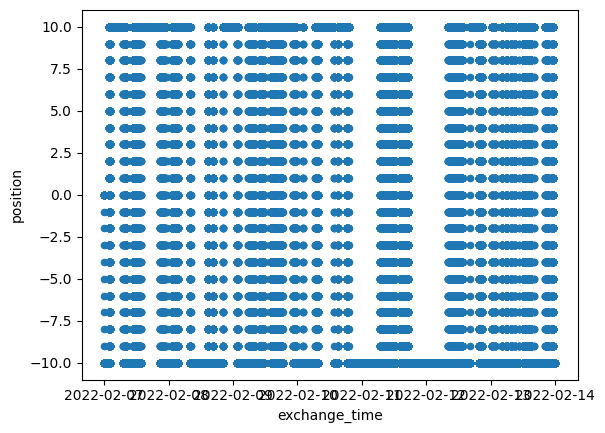

In [37]:
exchange_data.plot.scatter(x='exchange_time', y='position')

<AxesSubplot:xlabel='exchange_time', ylabel='EMA'>

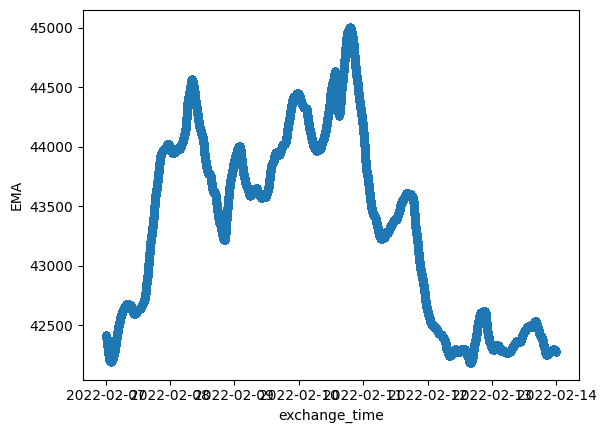

In [38]:
exchange_data.plot.scatter(x='exchange_time', y='EMA')